1.generate the data from iris dateset which is with 4 features and 3 labels.
2.abandon feature 3 and feature 4 (x3,x4) for visualiizng easily (maybe in a better way like faltten the features in the future),and combine label 3 with label 2 making only 2 label in dataset for doing two labels classification easily.
3.generate the new dataset from the original iris dataset above,by adding bounded error  into each data above(x1 +- (x1mean * errx1 +- (x2mean * err) but keep each original data.That is,the new one is 4 times more than previous(ex.117 vs 585).
4.Now, we have two dataset,original one and the one with bounded error
5.Do the SVM 
6.Test two model with th clean data without bounded error in it.

In [89]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
x = iris.data
y = iris.target
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [90]:
df_original = pd.DataFrame(x)
df_2feature = df_original.iloc[: , :-2]
df_2feature[2]  = y
print(df_2feature,df_2feature[2].value_counts())

       0    1  2
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  2
146  6.3  2.5  2
147  6.5  3.0  2
148  6.2  3.4  2
149  5.9  3.0  2

[150 rows x 3 columns] 0    50
1    50
2    50
Name: 2, dtype: int64


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
#df_2feature = df_2feature.iloc[:-50,:]
df_2feature.columns = ['x1','x2','y']
df_2feature.loc[df_2feature.y==2,'y']=1
print(df_2feature['y'].value_counts(),df_2feature)


1    100
0     50
Name: y, dtype: int64       x1   x2  y
0    5.1  3.5  0
1    4.9  3.0  0
2    4.7  3.2  0
3    4.6  3.1  0
4    5.0  3.6  0
..   ...  ... ..
145  6.7  3.0  1
146  6.3  2.5  1
147  6.5  3.0  1
148  6.2  3.4  1
149  5.9  3.0  1

[150 rows x 3 columns]


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [92]:
subset = df_2feature.sample(frac=0.2,replace=False,random_state=43)
df_2feature = df_2feature.append(subset)
print(df_2feature.info())
df_2feature = df_2feature.drop_duplicates(subset=['x1','x2','y'],keep=False)
print(df_2feature.info(),subset.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      180 non-null    float64
 1   x2      180 non-null    float64
 2   y       180 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.6 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 3 to 148
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      71 non-null     float64
 1   x2      71 non-null     float64
 2   y       71 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 2.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 30 to 10
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      30 non-null     float64
 1   x2      30 non-null     float64
 2   y       30 non-null     int64  
dtypes: float64(2), int64(1)
me

In [93]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.1
e2 = temp['x2'].mean()*0.1

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.695634,1.0
351,6.3,3.095634,1.0
352,6.4,2.795634,1.0
353,6.8,2.895634,1.0


In [94]:
def plot_hyperplane(clf, X, y,h=0.02,draw_sv=True,title='hyperplane'):
    # create a mesh to plot in
    plt.figure(figsize=(10,6))
    X = np.mat(X)
    # print("X",X)
    # print("y",y)
 
    # 使用numpy的库函数找到最值,确定绘图范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
 
    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    # print("Z", np.c_[xx.ravel(), yy.ravel()])
    
    # x,y扁平化,生成二维坐标并将预测值作为函数值
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])  # SVM的分割超平面
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    # 绘制康拓图
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)
 
    markers = ['o', '*', '^']
    colors = ['r', 'b', 'c']
    # 去重
    labels = np.unique(y)
    # print("LABELS",y)
 
    # 对于每一个标签种类
    for label in labels:
        # 这是掩码索引
        label = int(label)
        plt.scatter(X[y == label][:, 0].tolist(),
                    X[y == label][:, 1].tolist(),
                    c=colors[label],
                    marker=markers[label])
    # 画出支持向量
    if draw_sv:
        sv = clf.support_vectors_
        print(sv)
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


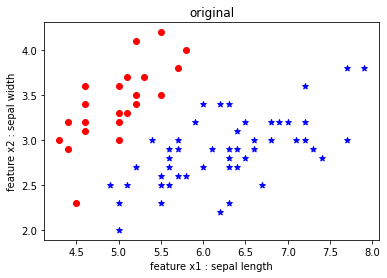

BESVM Accuracy (on training) = with bounded error 0.1 : 0.9295774647887324
BESVM Accuracy (on testing) = with bounded error 0.1 : 0.9577464788732394


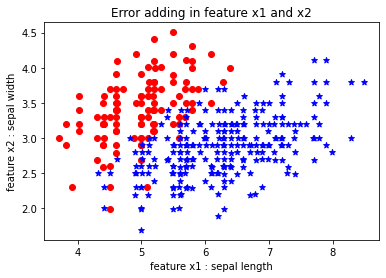

In [95]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with bounded error 0.1 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with bounded error 0.1 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


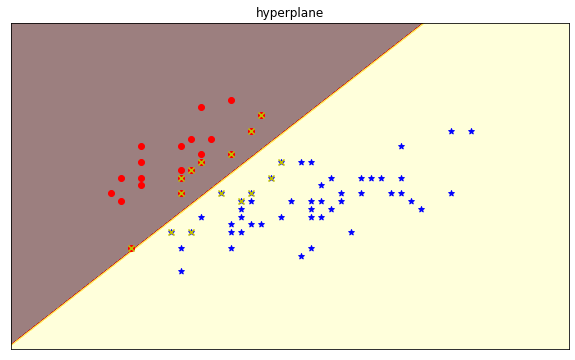

[[5.68619718 3.3       ]
 [5.2        3.0956338 ]
 [5.1        3.3       ]
 [5.8        3.6956338 ]
 [5.5        3.5       ]
 [5.68619718 3.7       ]
 [4.5        2.3       ]
 [5.08619718 2.3       ]
 [4.5        1.9956338 ]
 [5.5        3.1956338 ]
 [5.         2.9956338 ]
 [5.7        3.4956338 ]
 [5.3        3.3956338 ]
 [4.6        2.7956338 ]
 [4.6        2.8956338 ]
 [4.5        2.6043662 ]
 [5.78619718 3.5       ]
 [5.58619718 3.        ]
 [5.         3.        ]
 [4.88619718 3.        ]
 [6.28619718 3.8       ]
 [4.98619718 2.9       ]
 [6.08619718 3.5       ]
 [5.         2.6956338 ]
 [4.3        2.6956338 ]
 [5.78619718 3.4       ]
 [5.         3.2       ]
 [6.38619718 4.        ]
 [5.58619718 3.2       ]
 [5.18619718 3.1       ]
 [5.58619718 3.6       ]
 [5.01380282 2.8       ]
 [5.61380282 3.4       ]
 [5.9        3.5043662 ]
 [4.51380282 2.5       ]
 [6.2        3.4       ]
 [4.41380282 2.3       ]
 [6.         3.4       ]
 [5.6        3.2043662 ]
 [5.31380282 3.2       ]


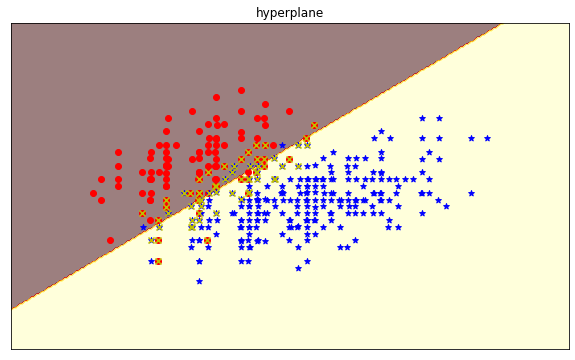

In [96]:
plot_hyperplane(clf_original,x_original,y_original)
plt.show()
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()

In [97]:
test_x = subset.iloc[:,:-1].values
test_y = subset.iloc[:,-1].values

y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with bounded error 0.1 : '+str(result_be_test))




Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with bounded error 0.1 : 1.0


Below is error in 20%

In [98]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.2
e2 = temp['x2'].mean()*0.2

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.391268,1.0
351,6.3,2.791268,1.0
352,6.4,2.491268,1.0
353,6.8,2.591268,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


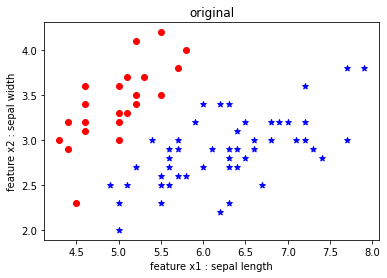

BESVM Accuracy (on training) = with bounded error 0.2 : 0.8380281690140845
BESVM Accuracy (on testing) = with bounded error 0.2 : 0.8309859154929577


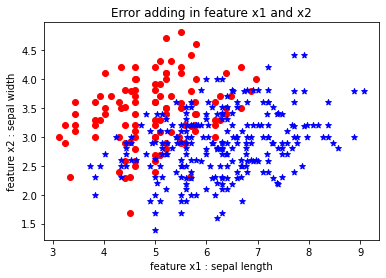

In [99]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with bounded error 0.2 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with bounded error 0.2 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.2        4.00873239]
 [6.27239437 3.3       ]
 [5.2        2.79126761]
 [5.1        3.09126761]
 [5.5        4.2       ]
 [5.1        3.3       ]
 [5.8        3.39126761]
 [5.5        3.5       ]
 [4.6        3.1       ]
 [4.4        2.59126761]
 [6.27239437 3.7       ]
 [4.5        2.3       ]
 [5.67239437 2.3       ]
 [4.5        1.69126761]
 [5.5        2.89126761]
 [4.6        3.2       ]
 [5.1        3.90873239]
 [5.         2.69126761]
 [5.77239437 3.6       ]
 [4.6        3.6       ]
 [5.7        3.19126761]
 [5.3        3.09126761]
 [5.         3.60873239]
 [4.6        2.99126761]
 [4.6        2.49126761]
 [5.         3.3       ]
 [4.6        2.79126761]
 [5.         3.80873239]
 [4.6        2.59126761]
 [4.5        2.90873239]
 [6.37239437 4.1       ]
 [5.5        3.59126761]
 [5.         2.99126761]
 [6.37239437 3.5       ]
 [3.82760563 3.        ]
 [6.17239437 3.        ]
 [5.         3.        ]
 [5.3        3.7       ]
 [5.47239437 3.        ]
 [6.87239437 3.8       ]


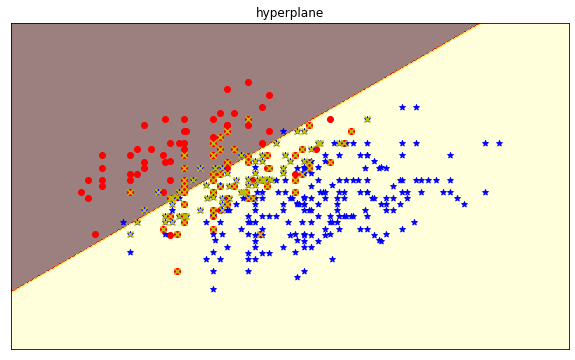

[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


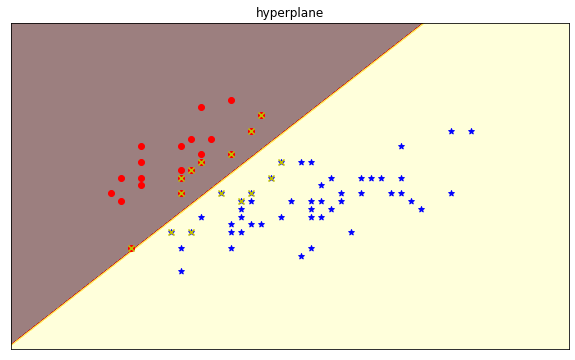

In [100]:
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()
plot_hyperplane(clf_original,x_original,y_original)
plt.show()

In [101]:
y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with bounded error 0.2 : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with bounded error 0.2 : 0.8666666666666667


Below is 30% error

In [102]:
pd.set_option('display.max_rows',10)
temp = df_2feature.copy()
df_2feature_be = pd.DataFrame.to_numpy(df_2feature)
e1 = temp['x1'].mean()*0.3
e2 = temp['x2'].mean()*0.3

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] += e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x1'].iteritems():
    temp['x1'][idx] = temp['x1'][idx] - e1
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] += e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

for idx,cell in temp['x2'].iteritems():
    temp['x2'][idx] = temp['x2'][idx] - e2
temp = temp.to_numpy()
df_2feature_be = np.vstack((df_2feature_be,temp))
temp = df_2feature.copy()

df_2feature_be = pd.DataFrame(df_2feature_be)
df_2feature_be


/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/johnny/Documents/MachineLearning/HW/venv/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,0,1,2
0,4.6,3.100000,0.0
1,5.0,3.600000,0.0
2,4.6,3.400000,0.0
3,4.4,2.900000,0.0
4,4.3,3.000000,0.0
...,...,...,...
350,7.7,2.086901,1.0
351,6.3,2.486901,1.0
352,6.4,2.186901,1.0
353,6.8,2.286901,1.0


Original Accuracy (on training) = 1.0
Original Accuracy (on testing) = 1.0


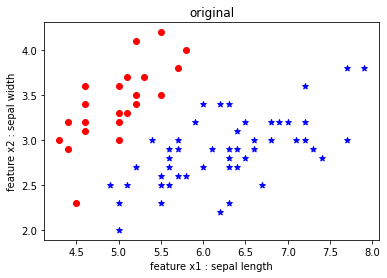

BESVM Accuracy (on training) = with bounded error 0.3 : 0.8028169014084507
BESVM Accuracy (on testing) = with bounded error 0.3 : 0.7464788732394366


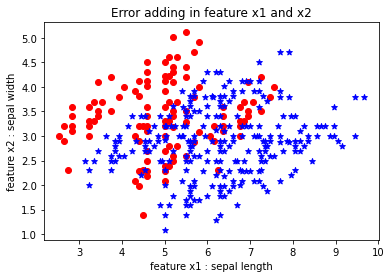

In [103]:
pd.set_option('display.max_rows',10)

x_original = df_2feature.iloc[:,:-1].values
y_original = df_2feature.iloc[:,-1].values
x_be = df_2feature_be.iloc[:, :-1].values
y_be = df_2feature_be.iloc[:,-1].values

X_train, X_test,y_train, y_test = train_test_split(x_original, y_original, test_size=0.2,random_state=1)
clf_original = SVC(kernel='linear',C=1,gamma='auto')
clf_original.fit(X_train, y_train)
y_original_predict = clf_original.predict(X_test)
result_orginal_train = clf_original.score(X_train, y_train)
result_orginal_test = clf_original.score(X_test, y_test)
print('Original Accuracy (on training) = '+str(result_orginal_train))
print('Original Accuracy (on testing) = '+str(result_orginal_test))
plt.scatter(x_original[y_original==0,0],x_original[y_original==0,1],color = 'r',marker = 'o')
plt.scatter(x_original[y_original==1,0],x_original[y_original==1,1],color = 'b',marker = '*')
plt.title('original')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()

X_train,X_test,y_train, y_test = train_test_split(x_be, y_be, test_size=0.2,random_state=1)
clf_BE = SVC(kernel='linear',C=1,gamma='auto')
clf_BE.fit(X_train, y_train)
y_BE_predict = clf_BE.predict(X_test)
result_BE_train = clf_BE.score(X_train, y_train)
result_BE_test = clf_BE.score(X_test, y_test)
print('BESVM Accuracy (on training) = with bounded error 0.3 : '+str(result_BE_train))
print('BESVM Accuracy (on testing) = with bounded error 0.3 : '+str(result_BE_test))

plt.scatter(x_be[y_be==0,0],x_be[y_be==0,1],color = 'r',marker = 'o')
plt.scatter(x_be[y_be==1,0],x_be[y_be==1,1],color = 'b',marker = '*')
plt.title('Error adding in feature x1 and x2')
plt.xlabel('feature x1 : sepal length')
plt.ylabel('feature x2 : sepal width')
plt.show()


[[5.         4.21309859]
 [5.2        4.31309859]
 [6.85859155 3.3       ]
 [5.2        2.48690141]
 [5.1        2.78690141]
 [5.5        4.2       ]
 [5.1        3.3       ]
 [5.8        3.08690141]
 [5.5        3.5       ]
 [4.6        3.1       ]
 [3.24140845 3.3       ]
 [4.4        2.28690141]
 [3.74140845 3.5       ]
 [6.85859155 3.7       ]
 [4.5        2.3       ]
 [6.25859155 2.3       ]
 [5.7        4.71309859]
 [4.5        1.38690141]
 [5.5        2.58690141]
 [4.6        3.2       ]
 [5.1        4.21309859]
 [5.8        4.91309859]
 [5.         2.38690141]
 [6.35859155 3.6       ]
 [4.6        3.6       ]
 [5.7        2.88690141]
 [5.3        2.78690141]
 [5.         3.91309859]
 [4.6        2.68690141]
 [3.24140845 3.2       ]
 [4.6        2.18690141]
 [5.         3.3       ]
 [4.6        2.48690141]
 [5.         4.11309859]
 [2.84140845 3.1       ]
 [4.6        2.28690141]
 [4.5        3.21309859]
 [4.6        4.11309859]
 [6.95859155 4.1       ]
 [5.5        3.28690141]


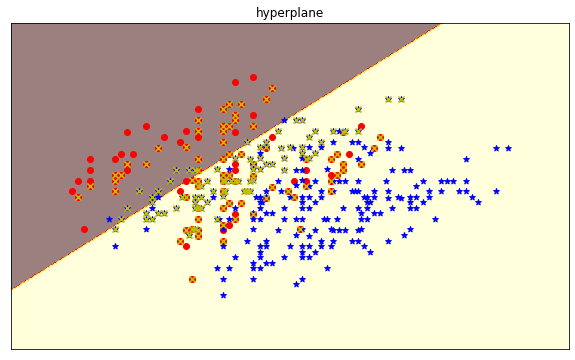

[[5.  3. ]
 [5.  3.2]
 [4.5 2.3]
 [5.7 3.8]
 [5.5 3.5]
 [5.8 4. ]
 [5.1 3.3]
 [5.2 3.4]
 [5.1 2.5]
 [6.  3.4]
 [5.9 3.2]
 [5.6 2.9]
 [4.9 2.5]
 [5.7 3. ]
 [5.4 3. ]]


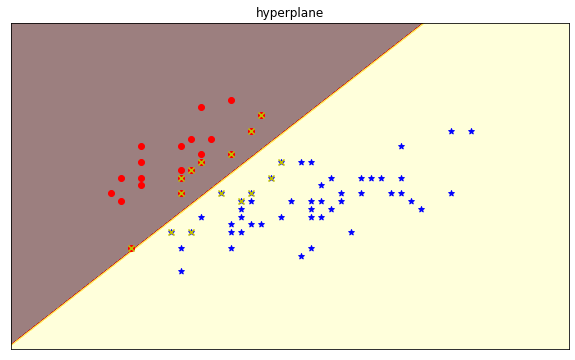

In [104]:
plot_hyperplane(clf_BE,x_be,y_be)
plt.show()
plot_hyperplane(clf_original,x_original,y_original)
plt.show()

In [105]:
y_original_predict = clf_original.predict(test_x)
result_orginal_test = clf_original.score(test_x, test_y)

y_BE_predict = clf_BE.predict(test_x)
result_be_test = clf_BE.score(test_x, test_y)

print('Original Accuracy (on testing) = '+str(result_orginal_test))
print('BESVM Accuracy (on no BE testing input) = with bounded error 0.3 : '+str(result_be_test))

Original Accuracy (on testing) = 1.0
BESVM Accuracy (on no BE testing input) = with bounded error 0.3 : 0.6333333333333333
